# Design and Off-design Performance

Operation of components is restricted once a component has been built. While designing components some of their parameters are not yet fixed. They are results of the design calculation and chosen to match the performance data defined in this phase of the components life cycle. After construction some of the components parameters may still be variable on the one hand. This holds for many thermodynamic properties. On the other hand other parameters are physically fixed. This holds for diameters of pipes, areas of heat exchangers and so on. As a consequence the component's performance is determined by its physical construction.

## Components and their design parameters


### Piping

A pipe or any other type of piping can be designed in order to meet certain performance requirements. During design a construction is chosen in order to match

- Pressure loss and 
- Heat loss at a desired
- Mass flow (and piping length) of a
- Fluid

A pipe (or even a more complex piece of piping) in reality has physical parameters that can no longer be changed even if others may vary. Unchangable parameters of a built piping component are e.g.

- Diameters (in combination with piping length) and
- Thermal isolation

These physical parameters determine the characteristics of the piping when used at other temperatures, for other fluids or with decreasing or increasing mass flows.

### Heat exchanger

When designing a heat exchanger some parameters can be chosen within certain limits. Examples are:

- Temperatures (or temperature differences)
- Mass flow(s)
- Fluids involved
- Pressures (or pressure losses)

Once a heat exchanger is designed the following attributes are physically fixed:

- Heat exchange area
- piping diameters
- ther resulting heat transfer coefficient under defined conditions 

Additionally the material of a component is then chosen. In terms of the thermal simulation this is a parameters that implicitly affects the coefficient of heat transfer. The heat exchanger could still transfer a higher or lower heat flow depending on the mass flows that are admitted to the component and their thermodynamic variables of state. But the window of performance is now restricted in comparison to the calculations that where possible while designing the component.

### Turbomachinery

Analogously data that can be defined during the design of a compressor is

- Mass flow
- Pressure ratio
- (Isentropic) efficiency at defined
- Themodynamic conditions (typically defined for the inlet)

Physical properties of compressors are then

- Inlet and outlet area (e.g. defined by diameters etc.)
- Length, angle etc. of compressor blading
- Nominal rotational speed

The same holds for turbines.

## Handling Off-Design Performance of Components with TESPy

TESPy offers options to handle this effect. We will start exploring the respective features with a simple example.

### Simple pipe

In a first step we will consider a pipe for compressed air. We will try to find out, how pressure losses evolve with different mass flows. For this purpose we start simulating a pipe for defined conditions. We use a mode to calculate the pipe based on construction data and basic correlations known from fluid dynamics. We assume

- Pipe length: 200 m
- Pressure drop: 0.02 bar
- Inlet conditions: 5 bar, 25 °C
- perfect thermal insolation

and could then determine the respective pipe diameter using this script

In [4]:
from tespy.networks import Network
from tespy.connections import Connection
from tespy.components import(
    Source,
    Pipe,
    Sink
)

import numpy as np
import matplotlib.pyplot as plt

# define piping network
pn = Network()

# create components without parametrization
air_in = Source('air inlet')
pip = Pipe('pipe')
air_out = Sink('air outlet')

# set up topology
c01 = Connection(air_in, 'out1', pip, 'in1', 'c01')
c02 = Connection(pip, 'out1', air_out, 'in1', 'c02')

pn.add_conns(c01, c02)

# parametrize
fluid = {'Air': 1} 
p_in = 5e5 #inlet pressure in Pa
T_in = 298.15 #inlet temperature in K
m = 1 #air mass flow in kg/s

c01.set_attr(fluid=fluid, p=p_in, T=T_in, m=m)
pip.set_attr(Q=0) # assume adiabatic piping

pip.set_attr(dp=0.02e5, ks=0.00005, L=200, D='var')

pn.set_attr(iterinfo=False)
pn.solve(mode='design')
pn.print_results()

d=pip.get_attr('D').val
print(f'The pipe diameter is {d:.2} m')



##### RESULTS (Pipe) #####
+------+-----------+----------+----------+----------+----------+----------+----------+---------+------+--------+
|      |         Q |       pr |       dp |     zeta |        D |        L |       ks |   ks_HW |   kA |   Tamb |
|------+-----------+----------+----------+----------+----------+----------+----------+---------+------+--------|
| pipe | -5.82e-11 | 9.96e-01 | 2.00e+03 | 1.44e+04 | 1.87e-01 | 2.00e+02 | 5.00e-05 |     nan |  nan |    nan |
+------+-----------+----------+----------+----------+----------+----------+----------+---------+------+--------+
##### RESULTS (Connection) #####
+-----+-----------+-----------+-----------+-----------+------------+----------------------+
|     |         m |         p |         h |         T |          x | phase                |
|-----+-----------+-----------+-----------+-----------+------------+----------------------|
| c01 | 1.000e+00 | 5.000e+05 | 4.235e+05 | 2.982e+02 | -1.000e+00 | state not recognised |
| c02 

We could then stick to that diameter and calculate the resulting pressure loss for different mass flows and plot the results.

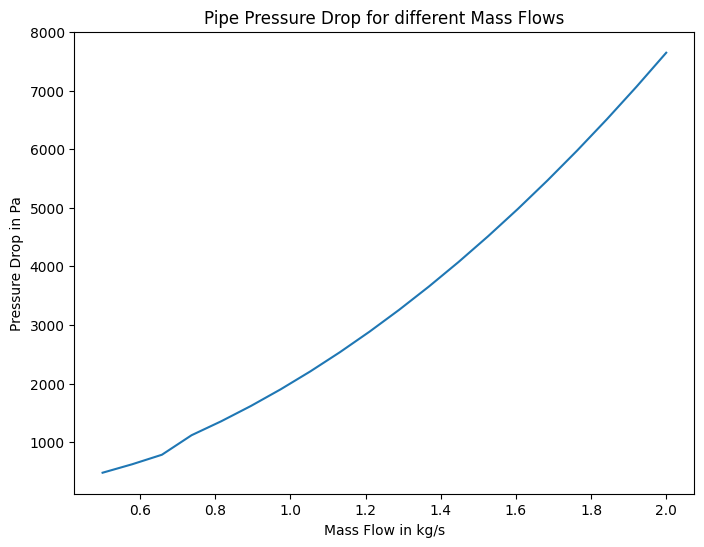

In [8]:
pip.set_attr(dp=None)
pip.set_attr(D=d)

m_range = np.linspace(m*0.5, m*2, 20)
dp_range = np.empty([20])

i=0
for m_new in m_range:
    c01.set_attr(m=m_new)
    pn.solve(mode='design')
    dp_range[i]=pip.get_attr('dp').val
    i +=1

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(m_range, dp_range)
ax.set_title('Pipe Pressure Drop for different Mass Flows')
ax.set_xlabel('Mass Flow in kg/s')
ax.set_ylabel('Pressure Drop in Pa')
plt.show()

### Turbine in Off-Design Operation

The next example would be to design a turbine and then operate it under changed conditions. We consider a steam turbine that is designed for this setup.

- Inlet conditions: 80 bar, 550 °C
- condenser pressure: 0.1 bar

There is more data needed to specify the design calculations. Make up your mind which information is missing.

After that you might write a script like this for designing the turbine.

After designing the turbine we could now use the very same turbine with a different mass flow. Let's find out how

- turbine inlet pressure
- turbine power output and
- turbine efficiency 

change.


### Compressor

Consider a gas turbine compressor
Build a model of a gas turbine compressor with an inlet pressure of 1 bar, an inlet temperature of 25 °C and a pressure ratio of 10
What specifications are needed to design the compressor?
Run a sensitivity study in offdesign mode by applying a compressor map
Try to identify, how compressor maps can be read? What attributes does the compressor map control?
How do pressure ration and efficiency change when changing volumetric flow?
How does the compressor inlet temperature affect the compressor performance?



### Heat Exchanger

Consider a condensing heat exchanger
Build a model of a condenser
What specifications are needed to design the condenser?
Run a sensitivity study in offdesign mode changing the condensing mass flow
How does the condensation pressure change?

## Next steps

Using this approach it is possible to calculate complete cycles in off-design. Try to set up respective models for a simple steam turbine cycle and for a gas turbine cycle to train you expertise and check if you got the point in off design modelling with TESPy.

For the rankine cycle model you could study the effects of changing the overall power generation on
- Required steam mass flow
- Condensation pressure
- Turbine inlet pressure
- Thermal efficiency

You could use a gas turbine model to study the effects of a change in overall power generation on
- Required air and fuel mass flow
- Cycle efficiency
- Turbine inlet temperature
- Turbine outlet temperature



